In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [6]:
csv1 = pd.read_csv('data/calories.csv')

In [7]:
csv1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
csv2 = pd.read_csv('data/exercise.csv')

In [9]:
csv2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
csv3 = csv1.drop(['User_ID'], axis=1)


In [11]:
csv3.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [12]:
the_dataset = pd.concat([csv2, csv3],axis=1)

# train = pd.concat


In [13]:
the_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
the_dataset.shape

(15000, 9)

In [15]:
the_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [16]:
the_dataset.replace({'Gender':{'male':0, 'female':1}}, inplace=True)

In [17]:
the_dataset.head() 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [18]:
correlation = the_dataset.corr()

In [19]:
print(correlation['Calories'])

User_ID      -0.001661
Gender       -0.022357
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Calories      1.000000
Name: Calories, dtype: float64


In [20]:
sns.set()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

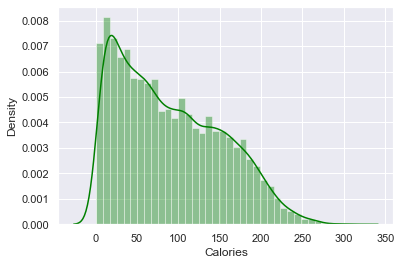

In [21]:
sns.distplot(the_dataset['Calories'], color='green')

In [22]:
the_dataset['Calories'].value_counts()

7.0      161
13.0     142
12.0     137
11.0     137
17.0     136
        ... 
272.0      1
300.0      1
280.0      1
314.0      1
287.0      1
Name: Calories, Length: 277, dtype: int64

In [23]:
#splittin
X = the_dataset.drop(['User_ID', 'Calories'], axis=1)
y = the_dataset['Calories']

In [24]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [26]:
model = XGBRegressor(n_estimators=100)

In [27]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [28]:
#prediction on training data
train_prediction = model.predict(X_train)

r_score = metrics.r2_score(train_prediction, y_train)
print('R squared error: ', r_score)

R squared error:  0.9995597615511252


In [29]:
#prediction on training data
test_prediction = model.predict(X_test)

r_score = metrics.r2_score(test_prediction, y_test)
print('R squared error: ', r_score)

R squared error:  0.9988458833326307


In [31]:
#evaluate using MAE
mae = metrics.mean_absolute_error(test_prediction, y_test)
print('Mean absolute error: ', mae)

Mean absolute error:  1.4796614986062049


In [30]:
import dill

In [32]:
# save the model to disk
#create a pickle file
#create a web application using html, css, javascript that will take input from the user and predict the calories burnt

filename = 'finalized_model.sav'
dill.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = dill.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)



In [34]:
#create a web application using html, css, javascript that will take input from the user and predict the calories burnt
 
import pickle
import numpy as np
from flask import Flask, request, jsonify, render_template
app = Flask(__name__)
model = pickle.load(open('finalized_model.sav', 'rb'))
@app.route('/')
def home():
    return render_template('index.html')
@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    output = round(prediction[0], 2)
    return render_template('index.html', prediction_text='Calories Burnt should be $ {}'.format(output))
if __name__ == "__main__":
    app.run(debug=False)

# Path: dlml\calories_burnt_prediction\templates\index.html

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Sep/2022 12:55:57] "GET / HTTP/1.1" 200 -
